In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty/")

In [154]:
import datajoint_utils as du
minnie,schema = du.configure_minnie_vm()

INFO - 2021-02-23 06:02:21,534 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-23 06:02:22,002 - settings - Setting enable_python_native_blobs to True


In [268]:
from pathlib import Path
import numpy as np
import neuron_visualizations as nviz
import datajoint as dj

import proofreading_utils as pru
import classification_utils as clu

import neuron_utils as nru

# Getting the list of cells that are proofread

In [5]:
# manually_proofread_cells = ((m65.UnitSeedGroup & 'group_method_id!=5' & 'group_method_id!=6') * 
#  (du.m65mat.ProofreadFunctionalCoregV2 & 'ver=43')).fetch('nucleus_id')

In [6]:
manually_proofread_cells.shape

(74,)

In [11]:
validation_folder = Path("./aug_syn_files/")
val_file_names = list(validation_folder.iterdir())
val_segment_ids = [int(k.stem) for k in val_file_names]

In [131]:
curr_index = 2 #worked but had some errors
curr_index = 5
curr_index = 7
current_file = val_file_names[curr_index]
original_segment_id = val_segment_ids[curr_index]
original_segment_id

864691135382947307

In [140]:
viable_proofread_ids = []
for v_seg in val_segment_ids:
    if v_seg in aug_to_v7_table["old_seg_id"].to_list():
        viable_proofread_ids.append(v_seg)

In [151]:
@schema
class AutoProofreadValidationSegment(dj.Manual):
    definition="""
    segment_id : bigint unsigned  #segment id for those to be decimated
    ---
    """
AutoProofreadValidationSegment.insert([dict(segment_id=k) for k in viable_proofread_ids ],skip_duplicates=True)
AutoProofreadValidationSegment()

segment_id segment id for those to be decimated
864691134988386682
864691135113167769
864691135212632448
864691135212690816
864691135233108569
864691135272164113
864691135348272855
864691135382947307
864691135393964789
864691135407289801


In [202]:
minnie.Decomposition() & minnie.AutoProofreadValidationSegment() & "n_error_limbs>0"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691135212632448,0,0.25,30.00,5,0,1,=BLOB=,627122,1290246,0,1,1,0,1,6,185,70,7318104.475983632,2277192.467242251,30429.29,95.346,95.346,433.323,421.42,1921,0.00026249966863745776,10.383783783783784,4385015.158,81,0.0004380828642052325,23.716,413279413191.4511,139194450.5361525,56473.56013401297,94248.11506921845,5102214977.6722355,2066.996
864691135589906955,0,0.25,30.00,5,0,1,=BLOB=,818368,1656604,0,1,1,0,1,8,190,94,8575703.015985034,3809618.661844763,26826.217,185.359,185.359,499.725,476.796,2256,0.00026306881147759387,11.873684210526315,5943405.512,110,0.00037958035934869926,20.509,397850012519.8114,99744500.62247784,46392.699441459496,66939.73879395147,3616818295.6346493,3163.6552
864691135748575017,0,0.25,30.00,5,0,1,=BLOB=,681153,1375265,0,1,1,0,1,5,101,50,5384045.172673779,2537162.8844406423,28845.377,387.357,311.997,579.942,541.061,2899,0.000538442733488494,28.702970297029704,4426200.944,76,0.0006549634859957682,38.145,677854019532.5143,156315239.07271242,125900.50747956191,153145.7853153705,8919131835.954136,5241.3673
864691135785277636,0,0.25,30.00,5,0,1,=BLOB=,910129,1842216,0,1,1,0,1,6,158,76,7462160.3748579975,3090883.3078111485,36163.632,385.022,294.079,545.787,507.664,4168,0.000558551383329029,26.379746835443036,6194378.075,118,0.000672868195892289,35.322,914837556912.889,132260918.22575875,122596.87690380121,147688.36287295702,7752860651.804145,3290.4614
864691135974454895,0,0.25,30.00,5,0,1,=BLOB=,673972,1339436,0,1,1,0,1,7,170,94,7859265.638205259,3912763.6763972887,28871.485,260.747,248.097,514.299,507.205,1847,0.0002350092343260942,10.864705882352942,5297060.918,104,0.00034868392653814674,17.76,301725053399.02094,106299788.58333333,38390.99825463118,56960.84263892941,2901202436.5290475,2294.0244
864691136003930314,0,0.25,30.00,5,0,1,=BLOB=,567120,1129806,0,1,1,0,1,7,104,45,5698914.924693043,2267490.293916757,36763.417,304.657,2

In [303]:
seg_id = 864691135113167769 #was checked and good
seg_id = 864691136333787571 #worked (with split)
seg_id = 864691135974454895 # worked (with split)
seg_id = 864691135212632448 #worked (with )
seg_id = 864691135589906955 #worked
seg_id = 864691135748575017
seg_id = 864691135785277636 #worked
seg_id = 864691136003930314
seg_id = 864691136056340440
seg_id = 864691136099807093
seg_id = 864691136535575714

In [304]:
neuron_obj = ((minnie.Decomposition() & minnie.AutoProofreadValidationSegment()) & dict(segment_id=seg_id)).fetch1("decomposition")

Decompressing Neuron in minimal output mode...please wait


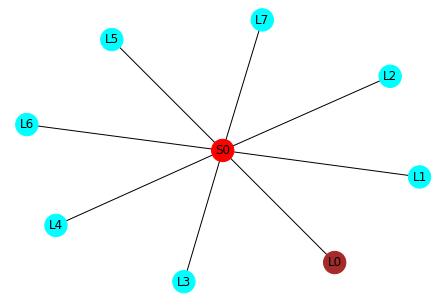

In [305]:
nviz.plot_soma_limb_concept_network(neuron_obj)

multi_soma_limbs = []
multi_touch_limbs = [0]


 -------- Working on limb 0------------
Starting combinations to process = [[28 30]]


---- working on disconnecting 28 and 30
---- This disconnects S0_0 from S0_1  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [28, 33, 44, 54, 29, 38, 34, 37, 30]
consider_path_neighbors_for_removal is set so segments_to_consider = [21 22 29 33 34 36 37 38 39 40 44 45 46 54 55 64 65]
Trying combining short segments with a larger threshold 2500
Short segments to combine = []
Found 2 high degree coordinates to cut
high_degree_endpoint_coordinates_widths = [425.8991903991946, 327.2780123942059]
high_degree_order = [1 0]
Picking [1363850.  448093.  732936.] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
coordinate_branches = [29, 54, 64, 65]
29 = red
54 = aqua
64 = purple
65 = green
Angle between 29 and 54 = 131.42 
Angle

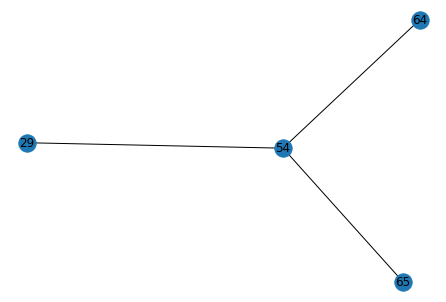

match_branches = [[29, 64], [54, 65]]
edges_to_delete (resolve crossover) = [[29, 54], [29, 65], [54, 64], [64, 65]]
edges_to_create (resolve crossover) = [[29, 64], [54, 65]]
nx.number_connected_components(G) before = 1
G.edges() = [(28, 33), (33, 44), (44, 54), (29, 38), (38, 34), (34, 37), (37, 30)]
G.nodes() = [28, 33, 44, 54, 29, 38, 34, 37, 30]
nx.number_connected_components(G) after = 2
Using the resolve crossover delete edges because will help seperate the path
skip_nodes = []
edges_to_delete (cut_limb_network) = [[29, 54], [29, 65], [54, 64], [64, 65]]
edges_to_create = [[29, 64], [54, 65]]
Number of connected components = 2
Comp 0 = {19, 21, 24, 25, 26, 28, 33, 35, 44, 45, 46, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 22, 23, 27, 29, 30, 31, 32, 34, 36, 37, 38, 39, 40, 41, 42, 43, 47, 48, 49, 50, 51, 52, 64, 66}
curr_limb_copy.deleted_edges = [[29,



---Working on Splitting Limb 0 with 2 components----


----Working on seperate_graph 0----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [1332100.  483944.  709172.]---------
Starting_edge inside branches_to_conept = [[1332100.  483944.  709172.]
 [1333000.  488290.  714682.]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [3]
printing out current edge:
[[1332100.  483944.  709172.]
 [1333000.  488290.  714682.]]
edge_endpoints_to_process was empty so exiting loop after 34 iterations
starting_node in concept map (that should match the starting edge) = 5
Total time for branches to concept conversion = 0.4403204917907715

Done generating concept network 




----Working on seperate_graph 1----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [1332610.  465935.  701567.]---------
Starting_edge inside branches_to_conept = [[1332610.  465935.  701567.]
 [1335110.  455263.  699166.]]
At the start, starting_node 

In [306]:
neuron_after_split = pru.split_neuron(neuron_obj,
                                verbose=True,
                                 plot_neuron_split_results=True,
                                plot_seperated_neurons=False)[0]

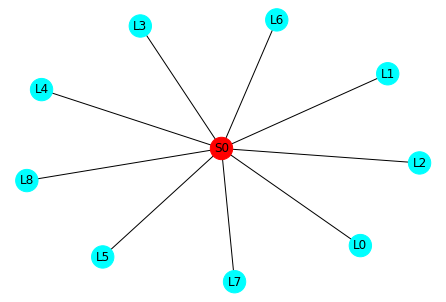

In [307]:
nviz.plot_soma_limb_concept_network(neuron_after_split)

In [308]:
#nviz.visualize_neuron_limbs(neuron_after_split)

In [309]:
# nviz.visualize_neuron(neuron_after_split,
#                      limb_branch_dict="all")

In [311]:
clu.axon_classification(neuron_after_split,
                       best_axon=True,
                        plot_candidates=False,
                       plot_axon_errors=True,
                       plot_axons=True)


Part 1: Axon like branchese 
{'L0': array([11, 16, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]), 'L1': array([0, 1, 3]), 'L2': array([10, 13]), 'L7': array([0]), 'L8': array([36, 41])}
Limb L0 soma angle: 134.41 
Limb L1 soma angle: 87.11 
Limb L2 soma angle: 85.53 
Limb L3 soma angle: 101.21 
Limb L4 soma angle: 118.52 
Limb L5 soma angle: 130.23 
Limb L6 soma angle: 103.95 
Limb L7 soma angle: 161.24 
Limb L8 soma angle: 16.53 

Part 2: possible_axon_limbs = [0, 1, 2, 3, 4, 5, 6, 7]

Phase 2: Working on Limb L0
nodes_to_eliminate = [5]

Phase 2: Working on Limb L1
nodes_to_eliminate = [17 19 20]

Phase 2: Working on Limb L2
nodes_to_eliminate = [1]

Phase 2: Working on Limb L3
nodes_to_eliminate = [13]

Phase 2: Working on Limb L4
nodes_to_eliminate = [2]

Phase 2: Working on Limb L5
nodes_to_eliminate = [0]

Phase 2: Working on Limb L6
nodes_to_eliminate = []

Phase 2: Working on Limb L7
nodes_to_eliminate = []

----Working on Limb L0-----
No endpoints were eliminated s


 Working on visualization type: mesh


({'L7': array([0.])},
 {'L0': array([11, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
  'L1': array([1]),
  'L2': array([13]),
  'L8': array([41])})

# Getting the Synapse Info

In [132]:
# 2) Get the matching v7 id
import pandas as pd
aug_to_v7_table = pd.read_csv("./proofread_cells_seg_correspondence_Aug1-v7.csv")
v7_id = aug_to_v7_table[aug_to_v7_table["old_seg_id"]==original_segment_id]["new_seg_id"].tolist()[0]
v7_id

864691135593659947

In [133]:
import system_utils as su
curr_synapse_table = su.load_object(current_file)
curr_synapse_table

,id,valid,pre_pt_position,pre_pt_supervoxel_id,pre_pt_root_id,ctr_pt_position,post_pt_position,post_pt_supervoxel_id,post_pt_root_id,size,pre_pt_root_id_Aug,post_pt_root_id_Aug
0,324236077,True,"[277230, 170582, 27809]",102893811633673884,864691135593659947,"[277260, 170606, 27810]","[277262, 170586, 27812]",102893811633680166,864691134443734171,2812.0,8.646911e+17,8.646911e+17
1,333807840,True,"[278530, 170754, 27769]",103034617841471953,864691135593659947,"[278604, 170772, 27765]","[278594, 170844, 27768]",103104986585640541,864691135457218117,15672.0,8.646911e+17,8.646911e+17
2,334069662,True,"[280600, 170450, 27596]",103316024031960459,864691135593659947,"[280598, 170380, 27595]","[280600, 170328, 27601]",103316024031963299,864691135455599429,8364.0,8.646911e+17,8.646911e+17
3,344181718,True,"[287218, 171000, 27164]",104230886425303347,864691135593659947,"[287184, 170974, 27161]","[287178, 170926, 27170]",104230886425313065,864691136917360750,11916.0,8.646911e+17,8.646911e+17
4,348100227,True,"[288688, 171386, 27086]",104442061310689631,864691135593659947,"[288694, 171312, 27089]","[288648, 171288, 27086]",104442061310687104,864691136116186788,8892.0,8.646911e+17,8.646911e+17
...,...,...,...,...,...,...,...,...,...,...,...,...
447,439304667,True,"[346760, 149266, 24656]",112461142940576652,864691136214992574,"[346752, 149322, 24656]","[346818, 149376, 24659]",112461142940575532,864691135593659947,12316.0,8.646911e+17,8.646911e+17
448,439304686,True,"[346760, 149948, 24597]",112461211659986932,864691135775886765,"[346757, 149915, 24588]","[346700, 149910, 24582]",112461211659939899,864691135593659947,1204.0,8.646911e+17,8.646911e+17
449,439304695,True,"[346850, 149970, 24577]",112461211593476546,864691135598708707,"[346776, 149932, 24581]","[346736, 149928, 24581]",112461211659965896,864691135593659947,23500.0,8.646911e+17,8.646911e+17
450,439305184,True,"[347260, 150030, 24621]",112531580404199760,864691136005508235,"[347302, 150038, 24628]","[347272, 150048, 24631]",112531580404212730,864691135593659947,9080.0,8.646911e+17,8.646911e+17


In [134]:
#eliminating the self connections
df_pre_filt = curr_synapse_table[(curr_synapse_table["pre_pt_root_id_Aug"] != curr_synapse_table["post_pt_root_id_Aug"]) & 
                                (curr_synapse_table["pre_pt_root_id"] != curr_synapse_table["post_pt_root_id"]) ]
df_pre_filt

,id,valid,pre_pt_position,pre_pt_supervoxel_id,pre_pt_root_id,ctr_pt_position,post_pt_position,post_pt_supervoxel_id,post_pt_root_id,size,pre_pt_root_id_Aug,post_pt_root_id_Aug
0,324236077,True,"[277230, 170582, 27809]",102893811633673884,864691135593659947,"[277260, 170606, 27810]","[277262, 170586, 27812]",102893811633680166,864691134443734171,2812.0,8.646911e+17,8.646911e+17
1,333807840,True,"[278530, 170754, 27769]",103034617841471953,864691135593659947,"[278604, 170772, 27765]","[278594, 170844, 27768]",103104986585640541,864691135457218117,15672.0,8.646911e+17,8.646911e+17
2,334069662,True,"[280600, 170450, 27596]",103316024031960459,864691135593659947,"[280598, 170380, 27595]","[280600, 170328, 27601]",103316024031963299,864691135455599429,8364.0,8.646911e+17,8.646911e+17
3,344181718,True,"[287218, 171000, 27164]",104230886425303347,864691135593659947,"[287184, 170974, 27161]","[287178, 170926, 27170]",104230886425313065,864691136917360750,11916.0,8.646911e+17,8.646911e+17
4,348100227,True,"[288688, 171386, 27086]",104442061310689631,864691135593659947,"[288694, 171312, 27089]","[288648, 171288, 27086]",104442061310687104,864691136116186788,8892.0,8.646911e+17,8.646911e+17
...,...,...,...,...,...,...,...,...,...,...,...,...
447,439304667,True,"[346760, 149266, 24656]",112461142940576652,864691136214992574,"[346752, 149322, 24656]","[346818, 149376, 24659]",112461142940575532,864691135593659947,12316.0,8.646911e+17,8.646911e+17
448,439304686,True,"[346760, 149948, 24597]",112461211659986932,864691135775886765,"[346757, 149915, 24588]","[346700, 149910, 24582]",112461211659939899,864691135593659947,1204.0,8.646911e+17,8.646911e+17
449,439304695,True,"[346850, 149970, 24577]",112461211593476546,864691135598708707,"[346776, 149932, 24581]","[346736, 149928, 24581]",112461211659965896,864691135593659947,23500.0,8.646911e+17,8.646911e+17
450,439305184,True,"[347260, 150030, 24621]",112531580404199760,864691136005508235,"[347302, 150038, 24628]","[347272, 150048, 24631]",112531580404212730,864691135593659947,9080.0,8.646911e+17,8.646911e+17


In [135]:
table_to_analyze = df_pre_filt
post_neurons_old = np.array(table_to_analyze["post_pt_root_id_Aug"].to_numpy()).astype("float64")
pre_neurons_old = np.array(table_to_analyze["pre_pt_root_id_Aug"].to_numpy()).astype("float64")
pre_indexes_old = np.where(pre_neurons_old == original_segment_id)[0]
post_indexes_old = np.where(post_neurons_old == original_segment_id)[0]

pre_indexes_old.shape, post_indexes_old.shape

((83,), (2634,))

In [136]:
table_to_analyze = df_pre_filt
post_neurons = np.array(table_to_analyze["post_pt_root_id"].to_numpy()).astype("float64")
pre_neurons = np.array(table_to_analyze["pre_pt_root_id"].to_numpy()).astype("float64")
pre_indexes= np.where(pre_neurons == v7_id)[0]
post_indexes = np.where(post_neurons == v7_id)[0]

pre_indexes.shape, post_indexes.shape

((50,), (2633,))

# Visualizing the Synapses that remain

In [137]:
curr_mesh = du.fetch_segment_id_mesh(original_segment_id)

In [138]:
vu.plot_classified_synapse_df_on_mesh(
    neuron_mesh = curr_mesh,
    synapse_df = df_pre_filt,
    segment_id_original = original_segment_id,
    segment_id_proofread = v7_id,
    synapses_type_to_plot=["valid_syn_centers_presyn",
                          "errored_syn_centers_presyn"],
    plot_error_synapses=True,
    synapses_type_to_not_plot = None,
    verbose=True,
synapse_scatter_size=0.4,
valid_presyn_color="black",
valid_postsyn_color="aqua",
error_presyn_color="red",
error_postsyn_color="orange",)

len(valid_syn_centers_presyn_df) = 50
len(valid_syn_centers_postsyn_df) = 2633
len(errored_syn_centers_presyn_df) = 33
len(errored_syn_centers_postsyn_df) = 1


/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [130]:
import ipyvolume as ipv
if False:
    description = raise Exception("")
    ipv.pylab.save(f"{original_segment_id}_{description}.html")

# Applying the Proofreading To the Synapses

In [ ]:
"""


"""

# Loading the synapse data from forrest

In [ ]:
# 1) Get the synapse file that corresponds to it
data_path = Path("./manual_proofread_data/")
current_file = data_path / Path(f"{segment_id}.pkl")
current_file

In [ ]:
import system_utils as su
curr_synapse_table = su.load_object(current_file)
#eliminating the self connections
df_pre_filt = curr_synapse_table[curr_synapse_table["pre_pt_root_id_Aug"] != curr_synapse_table["post_pt_root_id_Aug"]]
df_pre_filt